# Preambulo

In [2]:
import pandas as pd 
import geopandas as gpd
import shapely.geometry as geom
import geopandas as gpd
from simpledbf import Dbf5
import os
from unidecode import unidecode
import re
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Set locals for directories
working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"
unidad='Manzanas'
os.chdir(f"{working_dir}/Output/Graficas {unidad}")
# Test directories

os.listdir(working_dir)

['.Rhistory',
 'Datos',
 '.DS_Store',
 'Output',
 'Scripts',
 '.backups',
 'ANDI.Rproj',
 '.Rproj.user']

In [3]:
pwd

'/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Output/Graficas Manzanas'

In [1]:
#-------------------------------------------------------------------------
# Define function to plot scatter plots with regression line
#-------------------------------------------------------------------------
# datos = df.sort_values(by=y_crimen|, ascending=False)
def regplot(df,axes, x_sociodem:str, y_crimen:str, title:str, unidad:str, tit_sociodem:str, tit_crimen:str, filename=None, o=1,log=False, inv=False, colormap='viridis',sharetitle=False):
    # Sort the DataFrame by 'population_density' in descending order
    datos = df.copy()

    
    # Set titles for regression line legend title
    tajuste = "lineal"
    if log:
        tajuste = "logarítmico"
    elif o==2:
        tajuste = "cuadrático"
    
    # Plot regression plot for normal X-variable
    if inv==False:
        # Create a scatter plot
        print("Figsize debe ser 5,6") 
        # plt.figure(figsize=(5, 6))  # Adjust the figure size as needed
        points = axes.scatter(x=datos[x_sociodem], y=datos[y_crimen], 
                            c=datos[x_sociodem], cmap='viridis')

        # Create a colormap for coloring points based on population density
        cbar=plt.colorbar(points,label=tit_sociodem, location='bottom', ax=axes)
        plot=sns.regplot(y=y_crimen,x=x_sociodem,
                data=datos,
                order=o, scatter=False,
                color="black",
                logx=log,
                truncate=True,
                label=f'Ajuste {tajuste}', ax=axes)
    
    # Plot regression plot for inverted X-variable
    elif inv:
        print("Figsize debe ser 6,5") 
        xinverted=datos[x_sociodem]*-1
        
        # Create a scatter plot
        # plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
        points = axes.scatter(x=xinverted, y=datos[y_crimen], 
                            c=datos[x_sociodem], cmap=colormap)

        # Create a colormap for coloring points based on population density
        cbar=plt.colorbar(points,label=tit_sociodem, location='right', ax=axes)
        
        plot=sns.regplot(y=y_crimen,x=xinverted,
                data=datos,
                order=o, scatter=False,
                color="black",
                logx=log,
                truncate=True,
                label=f'Ajuste {tajuste}', ax=axes)
        plot.set(title=f"{title} por {unidad}",
                                xlabel=unidad,
                                ylabel=tit_crimen)
    if sharetitle: 
        plot.set(title=f"{title}",
                                xlabel=unidad,
                                ylabel=tit_crimen)
    else: 
        plot.set(title=f"{title} por {unidad}",
                                xlabel=unidad,
                                ylabel=tit_crimen)
    # Add labels and a colorbar
    axes.set_xticks([])  # Hide x_sociodem-axis labels
    # plt.xticks([])  # Hide x_sociodem-axis labels
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.ylim(0, datos[y_crimen].max()+10)
    plt.legend(frameon=False)

In [5]:
mzn_2018 = gpd.read_file(f"{data_dir}/3-AnalysisData/Bases listas/manzanas_censo_2018.gpkg")
mzn_2018.columns

Index(['manz_ccnct', 'shape_leng', 'shape_area', 'pop_2018',
       'p_nivel_anosr_mean', 'p_nivel_anosr_std', 'alguna_etnia_mean',
       'foraneo_mean', 'num_delitos_sexuales_2018', 'num_homicidios_2018',
       'num_hurto_a_personas_2018', 'num_hurto_a_residencias_2018',
       'num_hurto_automotores_2018', 'num_hurto_comercios_2018',
       'num_hurto_motocicletas_2018', 'num_violencia_intrafamiliar_2018',
       'tasa_num_delitos_sexuales_2018', 'tasa_num_homicidios_2018',
       'tasa_num_hurto_a_personas_2018', 'tasa_num_hurto_a_residencias_2018',
       'tasa_num_hurto_automotores_2018', 'tasa_num_hurto_comercios_2018',
       'tasa_num_hurto_motocicletas_2018',
       'tasa_num_violencia_intrafamiliar_2018', 'geometry'],
      dtype='object')

In [7]:
crime_names=['hurto_a_personas','hurto_comercios','violencia_intrafamiliar','hurto_motocicletas',
 'hurto_automotores','hurto_a_residencias','delitos_sexuales','homicidios']
crime_dict=pd.DataFrame({'crime':crime_names,
              'title_tasa':['Tasa de hurto a personas',
                            'Tasa de hurto a comercios',
                            'Tasa de violencia intrafamiliar',
                            'Tasa de hurto de motocicletas',
                            'Tasa de hurto de automotores',
                            'Tasa de hurto a residencias',
                            'Tasa de delitos sexuales',
                            'Tasa de homicidios'],
              'title':['Hurtos a personas',
                       'Hurtos a comercios',
                       'Casos de violencia intrafamiliar',
                       'Hurtos de motocicletas',
                       'Hurtos de automotores',
                       'Hurtos a residencias',
                       'Casos de delitos sexuales',
                       'Homicidios']})
# display(crime_dict)
crime_dict=crime_dict.iloc[[6,7,2,0,5,4,3,1],:].reset_index(drop=True)
crime_dict['tipo']=crime_dict['crime'].apply(lambda x: 'violento' if x in ['delitos_sexuales','homicidios','violencia_intrafamiliar'] else "propiedad")
display(crime_dict)

crime                       title_tasa  \
0         delitos_sexuales         Tasa de delitos sexuales   
1               homicidios               Tasa de homicidios   
2  violencia_intrafamiliar  Tasa de violencia intrafamiliar   
3         hurto_a_personas         Tasa de hurto a personas   
4      hurto_a_residencias      Tasa de hurto a residencias   
5        hurto_automotores     Tasa de hurto de automotores   
6       hurto_motocicletas    Tasa de hurto de motocicletas   
7          hurto_comercios        Tasa de hurto a comercios   

                              title       tipo  
0         Casos de delitos sexuales   violento  
1                        Homicidios   violento  
2  Casos de violencia intrafamiliar   violento  
3                 Hurtos a personas  propiedad  
4              Hurtos a residencias  propiedad  
5             Hurtos de automotores  propiedad  
6            Hurtos de motocicletas  propiedad  
7                Hurtos a comercios  propiedad

-------------------------
# Manzanas Censo 2018

## Agregar delitos manzanas

In [9]:
[i for i in mzn_2018.columns if "tasa" in i]

['tasa_num_delitos_sexuales_2018',
 'tasa_num_homicidios_2018',
 'tasa_num_hurto_a_personas_2018',
 'tasa_num_hurto_a_residencias_2018',
 'tasa_num_hurto_automotores_2018',
 'tasa_num_hurto_comercios_2018',
 'tasa_num_hurto_motocicletas_2018',
 'tasa_num_violencia_intrafamiliar_2018']

### Agregando crimen violento y por separado homicidios

In [10]:
v=[i for i in mzn_2018.columns if "tasa" in i and
 (("delitos_sexuales" in i) | ("homicidios" in i) | ("violencia_intrafamiliar" in i))]
v

['tasa_num_delitos_sexuales_2018',
 'tasa_num_homicidios_2018',
 'tasa_num_violencia_intrafamiliar_2018']

In [17]:
display(mzn_2018[v].head())
mzn_2018['crimen_violento_2018']=mzn_2018[v].sum(axis=1)
mzn_2018.columns

tasa_num_delitos_sexuales_2018  tasa_num_homicidios_2018  \
0                             NaN                       NaN   
1                         7692.31                       NaN   
2                             NaN                       NaN   
3                          635.32                       NaN   
4                             NaN                       NaN   

   tasa_num_violencia_intrafamiliar_2018  
0                                    NaN  
1                                    NaN  
2                                 904.98  
3                                 762.39  
4                                 159.30

Index(['manz_ccnct', 'shape_leng', 'shape_area', 'pop_2018',
       'p_nivel_anosr_mean', 'p_nivel_anosr_std', 'alguna_etnia_mean',
       'foraneo_mean', 'num_delitos_sexuales_2018', 'num_homicidios_2018',
       'num_hurto_a_personas_2018', 'num_hurto_a_residencias_2018',
       'num_hurto_automotores_2018', 'num_hurto_comercios_2018',
       'num_hurto_motocicletas_2018', 'num_violencia_intrafamiliar_2018',
       'tasa_num_delitos_sexuales_2018', 'tasa_num_homicidios_2018',
       'tasa_num_hurto_a_personas_2018', 'tasa_num_hurto_a_residencias_2018',
       'tasa_num_hurto_automotores_2018', 'tasa_num_hurto_comercios_2018',
       'tasa_num_hurto_motocicletas_2018',
       'tasa_num_violencia_intrafamiliar_2018', 'geometry',
       'crimen_violento_2018'],
      dtype='object')

### Agregando delitos contra la propiedad y hurto de personas por separado

In [11]:
# Set list with property crimes
p=[i for i in mzn_2018.columns if "tasa" in i and
 ("hurto" in i)]
p

['tasa_num_hurto_a_personas_2018',
 'tasa_num_hurto_a_residencias_2018',
 'tasa_num_hurto_automotores_2018',
 'tasa_num_hurto_comercios_2018',
 'tasa_num_hurto_motocicletas_2018']

In [19]:
# WARNING POTENCIAL EMBARRADA:, bookmark, creo que cometí un error: la tasa de ciertos delitos contra la propiedad es
# idéntica en algunas manzanas y esto es muy improbable.
display(mzn_2018[p].head())
mzn_2018['crimen_propiedad_2018']=mzn_2018[p].sum(axis=1)
mzn_2018.columns

tasa_num_hurto_a_personas_2018  tasa_num_hurto_a_residencias_2018  \
0                             NaN                                NaN   
1                         7692.31                                NaN   
2                         1809.95                             904.98   
3                         3557.81                             254.13   
4                             NaN                                NaN   

   tasa_num_hurto_automotores_2018  tasa_num_hurto_comercios_2018  \
0                              NaN                            NaN   
1                              NaN                        7692.31   
2                              NaN                            NaN   
3                              NaN                         254.13   
4                              NaN                            NaN   

   tasa_num_hurto_motocicletas_2018  
0                               NaN  
1                               NaN  
2                               NaN  
3                            254.13  
4                               NaN

Index(['manz_ccnct', 'shape_leng', 'shape_area', 'pop_2018',
       'p_nivel_anosr_mean', 'p_nivel_anosr_std', 'alguna_etnia_mean',
       'foraneo_mean', 'num_delitos_sexuales_2018', 'num_homicidios_2018',
       'num_hurto_a_personas_2018', 'num_hurto_a_residencias_2018',
       'num_hurto_automotores_2018', 'num_hurto_comercios_2018',
       'num_hurto_motocicletas_2018', 'num_violencia_intrafamiliar_2018',
       'tasa_num_delitos_sexuales_2018', 'tasa_num_homicidios_2018',
       'tasa_num_hurto_a_personas_2018', 'tasa_num_hurto_a_residencias_2018',
       'tasa_num_hurto_automotores_2018', 'tasa_num_hurto_comercios_2018',
       'tasa_num_hurto_motocicletas_2018',
       'tasa_num_violencia_intrafamiliar_2018', 'geometry',
       'crimen_violento_2018', 'crimen_propiedad_2018'],
      dtype='object')

In [25]:
# Fix list of crimens (Y variables) to iterate
Y=['crimen_violento_2018','tasa_num_homicidios_2018',
 'crimen_propiedad_2018','tasa_num_hurto_a_personas_2018']
Y

['crimen_violento_2018',
 'tasa_num_homicidios_2018',
 'crimen_propiedad_2018',
 'tasa_num_hurto_a_personas_2018']

## Eliminando manzanas outliers

In [81]:
df.columns

Index(['manz_ccnct', 'shape_leng', 'shape_area', 'pop_2018',
       'p_nivel_anosr_mean', 'p_nivel_anosr_std', 'alguna_etnia_mean',
       'foraneo_mean', 'num_delitos_sexuales_2018', 'num_homicidios_2018',
       'num_hurto_a_personas_2018', 'num_hurto_a_residencias_2018',
       'num_hurto_automotores_2018', 'num_hurto_comercios_2018',
       'num_hurto_motocicletas_2018', 'num_violencia_intrafamiliar_2018',
       'tasa_num_delitos_sexuales_2018', 'tasa_num_homicidios_2018',
       'tasa_num_hurto_a_personas_2018', 'tasa_num_hurto_a_residencias_2018',
       'tasa_num_hurto_automotores_2018', 'tasa_num_hurto_comercios_2018',
       'tasa_num_hurto_motocicletas_2018',
       'tasa_num_violencia_intrafamiliar_2018', 'geometry',
       'crimen_violento_2018', 'crimen_propiedad_2018'],
      dtype='object')

In [20]:
def calculate_fences(data):
    q1 = data.quantile(.25) #np.percentile(data, 25)
    q3 = data.quantile(.75) #np.percentile(data, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    return lower_fence, upper_fence


def drop_outliers(data, variable):
    s=data[variable]
    f=calculate_fences(data[variable])
    without_outliers = data[(s >= f[0]) & (s <= f[1])]
    return without_outliers
# Example usage of dropping outliers
# display(scatastral[tcrimen].describe())
# drop_outliers(scatastral, tcrimen)[tcrimen].describe()b

## Graficando con tendencia

In [22]:
S=[i for i in mzn_2018.columns if ("p_nivel_anosr_mean" in i)]
S

['p_nivel_anosr_mean']

### Nivel educativo máximo alcanzado

crimen_violento_2018 Var. sociodemografica: p_nivel_anosr_mean
tasa_num_homicidios_2018 Var. sociodemografica: p_nivel_anosr_mean


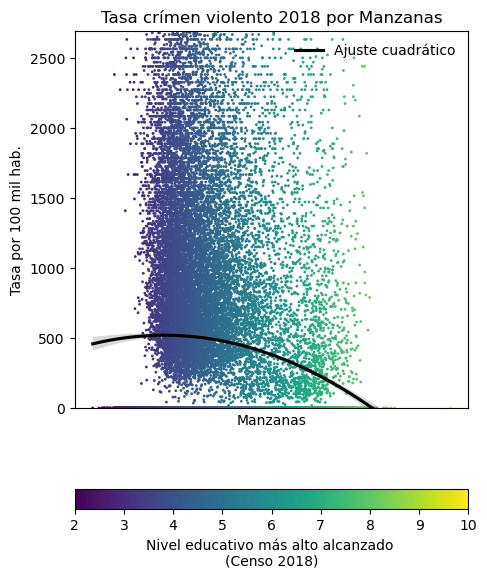

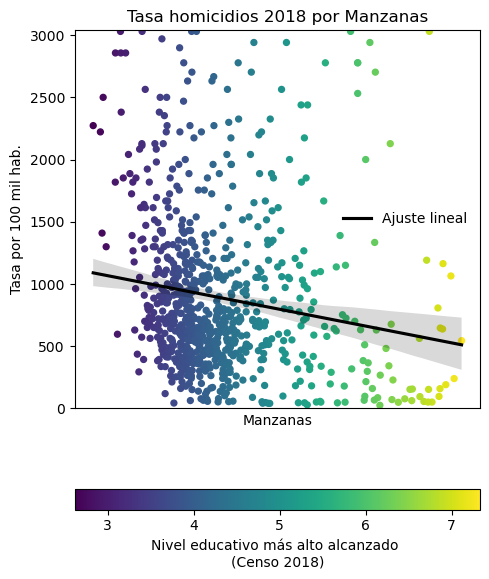

In [33]:
# Tasa Crimen violento - - - - - - - - - - - - - - - - - - - - - - - - - -
# Escoger datos
tcrimen = Y[0]
sociodem = S[0]
print(tcrimen, f"Var. sociodemografica: {sociodem}")
datos = mzn_2018.sort_values(by = tcrimen, ascending=False).iloc[0:]
datos = drop_outliers(datos, tcrimen)

# Graficar
regplot(df=datos,
      x_sociodem=sociodem, y_crimen=tcrimen,
      title=f"Tasa crímen violento 2018", tit_sociodem='Nivel educativo más alto alcanzado \n(Censo 2018)',
      unidad=unidad, tit_crimen='Tasa por 100 mil hab.',
      o=2, size=1)
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

# Tasa homicidios - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Escoger datos
tcrimen = Y[1]
sociodem = S[0]
print(tcrimen, f"Var. sociodemografica: {sociodem}")
datos = mzn_2018.sort_values(by = tcrimen, ascending=False).iloc[0:]
datos = drop_outliers(datos, tcrimen)

# Graficar
regplot(df=datos,
      x_sociodem=sociodem, y_crimen=tcrimen,
      title=f"Tasa homicidios 2018", tit_sociodem='Nivel educativo más alto alcanzado \n(Censo 2018)',
      unidad=unidad, tit_crimen='Tasa por 100 mil hab.',
      o=1, size=18)
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

crimen_propiedad_2018
tasa_num_hurto_a_personas_2018


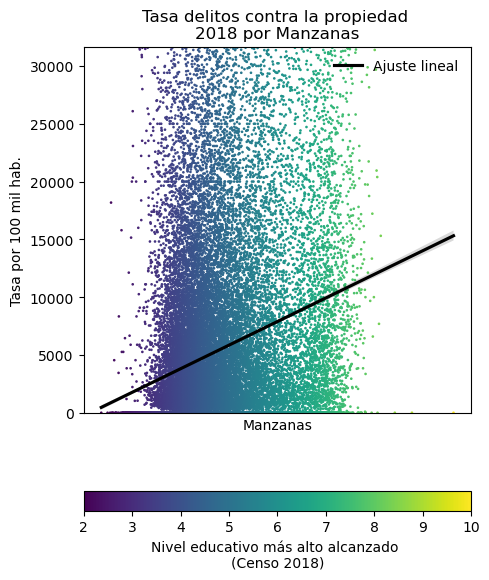

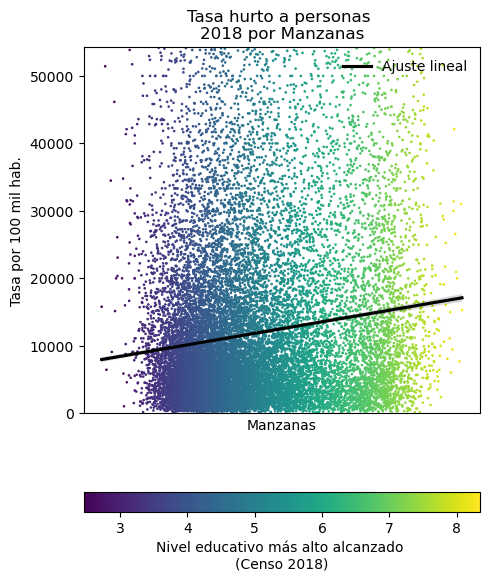

In [36]:
# Delitos propiedad - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Escoger datos
tcrimen = Y[2]
sociodem = S[0]
print(tcrimen)
datos = mzn_2018.sort_values(by = tcrimen, ascending=False).iloc[0:]
datos = drop_outliers(datos, tcrimen)

# Graficar
regplot(df=datos,
      x_sociodem=sociodem, y_crimen=tcrimen,
      title=f"Tasa delitos contra la propiedad \n2018", tit_sociodem='Nivel educativo más alto alcanzado \n(Censo 2018)',
      unidad=unidad, tit_crimen='Tasa por 100 mil hab.',
      o=1, size=.8)
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

# Hurto a personas - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Escoger datos
tcrimen = Y[3]
sociodem = S[0]
print(tcrimen)
datos = mzn_2018.sort_values(by = tcrimen, ascending=False).iloc[0:]
datos = drop_outliers(datos, tcrimen)

# Graficar
regplot(df=datos,
      x_sociodem=sociodem, y_crimen=tcrimen,
      title=f"Tasa hurto a personas \n2018", tit_sociodem='Nivel educativo más alto alcanzado \n(Censo 2018)',
      unidad=unidad, tit_crimen='Tasa por 100 mil hab.',
      o=1, size=.8)
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

---
# Manzanas Estratificadas

In [4]:
mzn_estrato = gpd.read_file(f"{data_dir}/3-AnalysisData/Bases listas/manzanas_estrato.gpkg")
mzn_estrato.columns

Index(['codigo_man', 'estrato', 'shape_area', 'shape_len',
       'num_delitos_sexuales_2018', 'num_homicidios_2018',
       'num_hurto_a_personas_2018', 'num_hurto_a_residencias_2018',
       'num_hurto_automotores_2018', 'num_hurto_comercios_2018',
       'num_hurto_motocicletas_2018', 'num_violencia_intrafamiliar_2018',
       'num_delitos_sexuales_2019', 'num_homicidios_2019',
       'num_hurto_a_personas_2019', 'num_hurto_a_residencias_2019',
       'num_hurto_automotores_2019', 'num_hurto_comercios_2019',
       'num_hurto_motocicletas_2019', 'num_violencia_intrafamiliar_2019',
       'num_delitos_sexuales_2020', 'num_homicidios_2020',
       'num_hurto_a_personas_2020', 'num_hurto_a_residencias_2020',
       'num_hurto_automotores_2020', 'num_hurto_comercios_2020',
       'num_hurto_motocicletas_2020', 'num_violencia_intrafamiliar_2020',
       'num_delitos_sexuales_2021', 'num_homicidios_2021',
       'num_hurto_a_personas_2021', 'num_hurto_a_residencias_2021',
       'num_hurt

## Agregando delitos manzanas

In [6]:
[i for i in mzn_estrato.columns if "tasa" in i]

[]

In [5]:
# Agregar cimen violento (en niveles, no tasas)
v=[i for i in mzn_estrato.columns if (("delitos_sexuales" in i) | ("homicidios" in i) | ("violencia_intrafamiliar" in i))]
print(v)
mzn_estrato['crimenes_violentos_sum']=mzn_estrato[v].sum(axis=1)

['num_delitos_sexuales_2018', 'num_homicidios_2018', 'num_violencia_intrafamiliar_2018', 'num_delitos_sexuales_2019', 'num_homicidios_2019', 'num_violencia_intrafamiliar_2019', 'num_delitos_sexuales_2020', 'num_homicidios_2020', 'num_violencia_intrafamiliar_2020', 'num_delitos_sexuales_2021', 'num_homicidios_2021', 'num_violencia_intrafamiliar_2021']


In [8]:
# Aggregate crimes against private property
p=crime_dict.query('tipo == "propiedad"')['crime'].to_list()
print(p)

dp = [i for i in mzn_estrato.columns if (((p[0] in i) | (p[1] in i) | (p[2] in i) | (p[3] in i) | 
                                         (p[4] in i)))]
dp                                         

mzn_estrato['crimenes_propiedad_sum']=mzn_estrato[dp].sum(axis=1)

['hurto_a_personas', 'hurto_a_residencias', 'hurto_automotores', 'hurto_motocicletas', 'hurto_comercios']


In [9]:
# Repeat for each unidad

# Sum homicides across all years
h=[i for i in mzn_estrato.columns if "homicidio" in i]
h
mzn_estrato['num_homicidios_2018_2021']=mzn_estrato[h].sum(axis=1)

# # Sum thefts to people across all years
hu = [i for i in mzn_estrato.columns if "hurto_a_per" in i]
hu
mzn_estrato['num_hurto_a_personas_2018_2021']=mzn_estrato[hu].sum(axis=1)

In [10]:
# Fix list of crimens (Y variables) to iterate
Y=['crimenes_violentos_sum','num_homicidios_2018_2021',
 'crimenes_propiedad_sum','num_hurto_a_personas_2018_2021']
print(Y)
display(mzn_estrato[Y].head())
mzn_estrato[Y].describe()

['crimenes_violentos_sum', 'num_homicidios_2018_2021', 'crimenes_propiedad_sum', 'num_hurto_a_personas_2018_2021']


crimenes_violentos_sum  num_homicidios_2018_2021  crimenes_propiedad_sum  \
0                     2.0                       0.0                    69.0   
1                     1.0                       0.0                     1.0   
2                     2.0                       1.0                    52.0   
3                     0.0                       0.0                    21.0   
4                     1.0                       0.0                   446.0   

   num_hurto_a_personas_2018_2021  
0                            68.0  
1                             0.0  
2                            51.0  
3                            19.0  
4                           432.0

crimenes_violentos_sum  num_homicidios_2018_2021  \
count            43765.000000              43765.000000   
mean                 0.974660                  0.096127   
std                  1.722028                  0.443257   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  1.000000                  0.000000   
max                 76.000000                 25.000000   

       crimenes_propiedad_sum  num_hurto_a_personas_2018_2021  
count            43765.000000                    43765.000000  
mean                67.240626                       64.902822  
std                177.049820                      174.039219  
min                  0.000000                        0.000000  
25%                  9.000000                        8.000000  
50%                 25.000000                       24.000000  
75%                 61.000000                       59.000000  
max               6903.000000                     6756.000000

## Graficando cantidades (no tasas) con tendencia

### Estrato manzana

In [11]:
S=[i for i in mzn_estrato.columns if ("estrato" in i)]
S

['estrato']

In [11]:
Y

['crimenes_violentos_sum',
 'num_homicidios_2018_2021',
 'crimenes_propiedad_sum',
 'num_hurto_a_personas_2018_2021']

#### Calculando crímenes por área de manzana

In [12]:
# Crímen violento y homicidios
mzn_estrato['crimenes_violentos_sum_area']=mzn_estrato['crimenes_violentos_sum']/mzn_estrato['shape_area']
mzn_estrato['num_homicidios_2018_2021_area']=mzn_estrato['num_homicidios_2018_2021']/mzn_estrato['shape_area']

# Delito contra la propiedad y hurtos
mzn_estrato['crimenes_propiedad_sum_area']=mzn_estrato['crimenes_propiedad_sum']/mzn_estrato['shape_area']
mzn_estrato['num_hurto_a_personas_2018_2021_area']=mzn_estrato['num_hurto_a_personas_2018_2021']/mzn_estrato['shape_area']


In [13]:
Y.append('crimenes_violentos_sum_area')
Y.append('num_homicidios_2018_2021_area')
Y.append('crimenes_propiedad_sum_area')
Y.append('num_hurto_a_personas_2018_2021_area')
Y

['crimenes_violentos_sum',
 'num_homicidios_2018_2021',
 'crimenes_propiedad_sum',
 'num_hurto_a_personas_2018_2021',
 'crimenes_violentos_sum_area',
 'num_homicidios_2018_2021_area',
 'crimenes_propiedad_sum_area',
 'num_hurto_a_personas_2018_2021_area']

In [14]:
# Revisar que la área que estoy usando para controlar por tamaño de manzana no sea muy diferente a
# la calculada por geopandas
mzn_estrato.to_crs(3857).area-mzn_estrato.shape_area

0        271.111009
1         17.976265
2         82.960746
3         23.369506
4         54.841831
            ...    
43760     17.135125
43761     34.581460
43762     27.698910
43763     31.514284
43764     34.447439
Length: 43765, dtype: float64

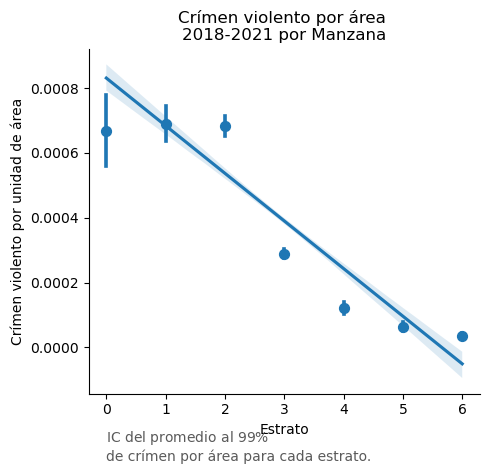

In [22]:
# Tasa Crimen violento - - - - - - - - - - - - - - - - - - - - - - - - - -
sociodem="estrato"
tcrimen="crimenes_violentos_sum_area"
p=sns.lmplot(x=sociodem, y=tcrimen, data=mzn_estrato, 
             x_estimator=np.mean, x_ci=99)
p.set(title="Crímen violento por área \n2018-2021 por Manzana",
      xlabel="Estrato", ylabel='Crímen violento por unidad de área')
plt.text(-.0003,-.00035,"IC del promedio al $99\%$ \nde crímen por área para cada estrato.",
         color="#5A5A5A")
plt.tight_layout()
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

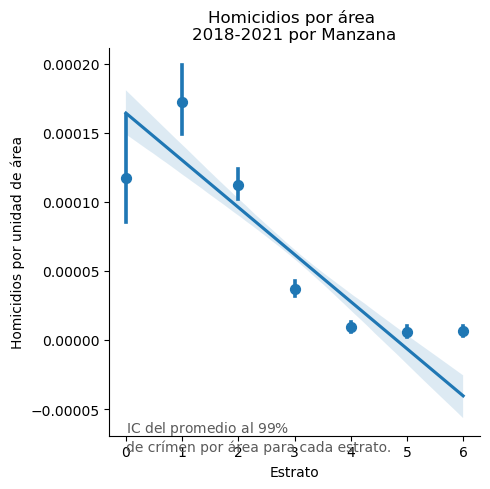

In [23]:
# Tasa homicidios - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
sociodem="estrato"
tcrimen="num_homicidios_2018_2021_area"
p=sns.lmplot(x=sociodem, y=tcrimen, data=mzn_estrato, 
             x_estimator=np.mean, x_ci=99)
p.set(title="Homicidios por área \n2018-2021 por Manzana",
      xlabel="Estrato", ylabel='Homicidios por unidad de área')
plt.text(-.0003,-.00008,"IC del promedio al $99\%$ \nde crímen por área para cada estrato.",
         color="#5A5A5A")
plt.tight_layout()
plt.savefig(f"{sociodem}_{tcrimen}.jpg", dpi=300)

2    15622
3    11982
1     6748
4     2437
5     1032
6      862
Name: estrato, dtype: int64

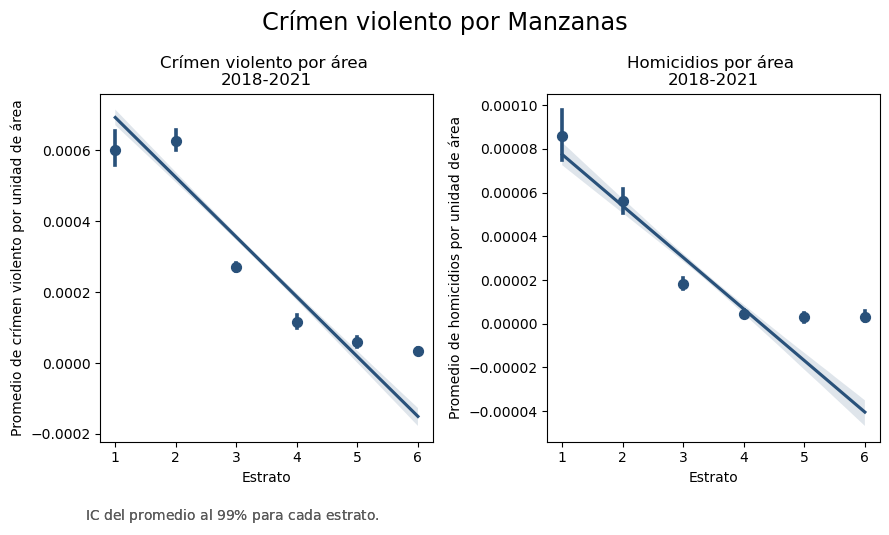

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Tasa Crimen violento - - - - - - - - - - - - - - - - - - - - - - - - - -
datos=mzn_estrato.query('estrato != 0')

sociodem="estrato"
tcrimen="crimenes_violentos_sum_area"
p=sns.regplot(x=sociodem, y=tcrimen, data=datos, 
             x_estimator=np.mean, x_ci=99, ax=axes[0], color="#29517a")
p.set(title="Crímen violento por área \n2018-2021",
      xlabel="Estrato", ylabel='Promedio de crímen violento por unidad de área')
plt.tight_layout()


# Tasa homicidios - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
sociodem="estrato"
tcrimen="num_homicidios_2018_2021_area"
p=sns.regplot(x=sociodem, y=tcrimen, data=datos, 
             x_estimator=np.mean, x_ci=99, ax=axes[1], color="#29517a")
p.set(title="Homicidios por área \n2018-2021",
      xlabel="Estrato", ylabel='Promedio de homicidios por unidad de área')

fig.suptitle("Crímen violento por Manzanas", fontsize='xx-large')
plt.tight_layout()
caption = plt.text(
    0.1,  # x-coordinate
    -0.05,  # y-coordinate
    "IC del promedio al $99\%$ para cada estrato.",  # caption text
    horizontalalignment="left",  # horizontal alignment
    verticalalignment="bottom",  # vertical alignment
    fontsize=10, color="#5A5A5A" # font size
      )
caption.set_transform(fig.transFigure)
fig.add_artist(caption)
plt.savefig(f"F10-{sociodem}_{tcrimen}.jpg",bbox_inches='tight', dpi=300)

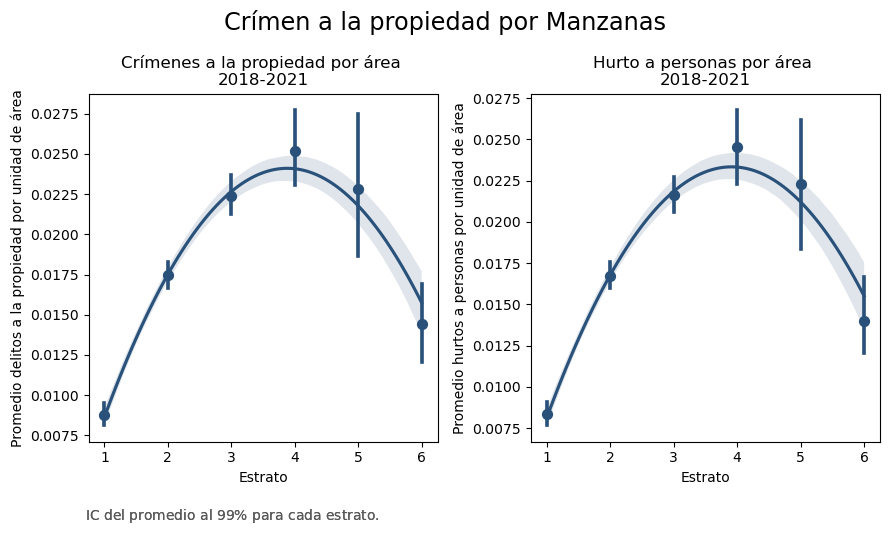

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
datos=mzn_estrato.query('estrato != 0')

# Delitos propiedad - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
sociodem="estrato"
tcrimen="crimenes_propiedad_sum_area"
p=sns.regplot(x=sociodem, y=tcrimen, data=datos, 
             x_estimator=np.mean, x_ci=99, order=2, ax=axes[0], color="#29517a")
p.set(title="Crímenes a la propiedad por área \n2018-2021",
      xlabel="Estrato", ylabel='Promedio delitos a la propiedad por unidad de área')



# Hurto a personas - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Delitos propiedad - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
sociodem="estrato"
tcrimen="num_hurto_a_personas_2018_2021_area"
p=sns.regplot(x=sociodem, y=tcrimen, data=datos, 
             x_estimator=np.mean, x_ci=99, order=2, ax=axes[1], color="#29517a")
p.set(title="Hurto a personas por área \n2018-2021",
      xlabel="Estrato", ylabel='Promedio hurtos a personas por unidad de área')

fig.suptitle("Crímen a la propiedad por Manzanas", fontsize='xx-large')
plt.tight_layout()
caption = plt.text(
    0.1,  # x-coordinate
    -0.05,  # y-coordinate
    "IC del promedio al $99\%$ para cada estrato.",  # caption text
    horizontalalignment="left",  # horizontal alignment
    verticalalignment="bottom",  # vertical alignment
    fontsize=10, color="#5A5A5A" # font size
      )
caption.set_transform(fig.transFigure)
fig.add_artist(caption)

plt.savefig(f"F11-{sociodem}_{tcrimen}.jpg",bbox_inches='tight', dpi=300)